<a href="https://colab.research.google.com/github/Liki990/Doc/blob/main/Github_pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from tensorflow.keras.models import load_model,Sequential  # type: ignore
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten  # type: ignore
from tensorflow.keras.preprocessing import image  # type: ignore
import matplotlib.pyplot as plt

In [4]:
def plot_history(history):
    """
    Plot the training and validation accuracy and loss curves.
    """
    # Retrieve training metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

# Define image dimensions and batch size
image_height, image_width = 224, 224
batch_size = 64

In [22]:
# Path to the dataset directories
train_dir = '/content/drive/MyDrive/github_pothole/Dataset/ttrain'
test_dir = '/content/drive/MyDrive/github_pothole/Dataset/validation'

In [23]:
# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [24]:
# Data preprocessing for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# Load and prepare training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',  # binary labels (pothole vs. not pothole)
    classes=['Potholes', 'not_potholes']  # specify the class names
)

# Load and prepare testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',  # binary labels (pothole vs. not pothole)
    classes=['potholes', 'not_potholes']  # specify the class names
)

Found 768 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [27]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),

    Dense(120, activation='relu'),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │      11,197,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,207,825 (42.75 MB)

 Trainable params: 11,207,825 (42.75 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 165s 13s/step - accuracy: 0.5587 - loss: 0.6593 - val_accuracy: 0.6970 - val_loss: 0.5079
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.7891 - loss: 0.4753 - val_accuracy: 0.9495 - val_loss: 0.2600
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.8432 - loss: 0.4075 - val_accuracy: 0.9495 - val_loss: 0.2066
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.8508 - loss: 0.3719 - val_accuracy: 0.9495 - val_loss: 0.1861
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.8619 - loss: 0.3319 - val_accuracy: 0.9444 - val_loss: 0.1750
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.8879 - loss: 0.2948 - val_accuracy: 0.9242 - val_loss: 0.1946
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.8945 - loss: 0.2637 - val_accuracy: 0.8636 - val_loss: 0.2547
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.8959 - loss: 0.2595 - val_accuracy: 0.9242 - val_lo

In [31]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9286 - loss: 0.1620
Test Accuracy: 0.9242424368858337


In [32]:
# Save the trained model
model.save('pothole_detection_model.h5')

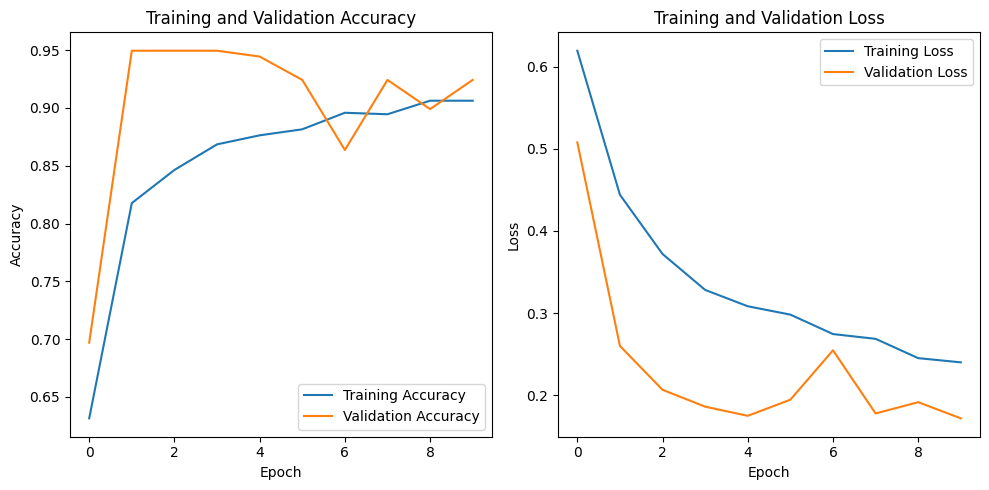

In [33]:
# Plot the performance curves
plot_history(history)